In [ ]:
!python -m spacy download en_core_web_lg

2022-11-19 14:28:52.993708: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
!tar -xzvf './CORD192020/cord/cord_19_embeddings.tar.gz' #update_path

cord_19_embeddings_5_12.csv


In [ ]:
!tar -xzvf './CORD192020/cord/document_parses.tar.gz' #update_path

Streaming output truncated to the last 5000 lines.
document_parses/pdf_json/b896a30f151326e3771fa5716674fb0d3d62af2c.json
document_parses/pmc_json/PMC7111472.xml.json
document_parses/pdf_json/121025f8d2feffd0148e80afb3540a3d305cf8cd.json
document_parses/pmc_json/PMC7114206.xml.json
document_parses/pdf_json/4c2016ac62f20ec4641d28d924d94a4cdcafe091.json
document_parses/pmc_json/PMC7129034.xml.json
document_parses/pdf_json/097529f4d953e2729951ac0f2ba6a001c6534146.json
document_parses/pmc_json/PMC7126362.xml.json
document_parses/pdf_json/b152d34ef49084fab76230427c4cc77bf5d0f3ec.json
document_parses/pmc_json/PMC7126310.xml.json
document_parses/pdf_json/d11a35914f31dab16b461c4dd6574c4716f8014c.json
document_parses/pmc_json/PMC7126547.xml.json
document_parses/pdf_json/8fd61d620483a0c7f420c44888a0f7607aa91eb3.json
document_parses/pmc_json/PMC7149825.xml.json
document_parses/pdf_json/4e2e942fe03ed73c8d2257b3f33df923e7b9a67a.json
document_parses/pmc_json/PMC7110500.xml.json
document_parses/pdf_j

In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.2 MB/s 
     |████████████████████████████████| 71 kB 8.6 MB/s 
     |████████████████████████████████| 13.5 MB 55.6 MB/s 
     |████████████████████████████████| 188 kB 56.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 532.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 6.0 MB/s 
     |████████████████████████████████| 660 kB 48.6 MB/s 
     |████████████████████████████████| 10.1 MB 42.7 MB/s 
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.5.0-py3-none-any.whl size=532569824 sha256=31cc9953f34a87e0348ef11b16079a1848bc6cef29554ac4632a05665e741491
  Stored in directory: /root/.cache/pip/wheels/c1/69/da/683231a48569a53313ed6530869e4743fe57c344412a56b25f
Successfully built en-core-sci-lg
  Attempting uninstall: typing

In [ ]:
!pip install spacy-langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 7.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993429 sha256=99fd16358b3944f1f266ee87df0497df6a5576cdfd9bc486388f8dbe62f51829
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect


In [ ]:
# Importing necessary packages

# General purpose packages 
import numpy as np
import pandas as pd
import json
import glob
import time
from datetime import datetime
import collections
#import h5py

import matplotlib.pyplot as plt

# Regex
import re

# Statistics
import seaborn as sns

# Spacy for NLP
import spacy
import en_core_sci_lg
from spacy_langdetect import LanguageDetector

#from spacy_langdetect import LanguageDetector
from spacy.language import Language
@Language.factory('language_detector')
def language_detector(nlp, name):
    return LanguageDetector()

# NLTK just for stopwords
import nltk 
nltk.download('stopwords')

# sklearn Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# sklearn KMeans and elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Doc2Vec
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from gensim.models.doc2vec import TaggedDocument

# Multicore processing
import multiprocessing
from multiprocessing import Pool, cpu_count
cores = multiprocessing.cpu_count()
from tqdm.contrib.concurrent import process_map

print("Number of CPU cores is : ", cores)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Number of CPU cores is :  2



--------------------------------------
Loading metatata ...14:40:52


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Metadata size :  (63571, 18)
Running time : 00:00:01 for Loading metatata ...
--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63571 entries, 0 to 63570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cord_uid          63571 non-null  object
 1   sha               48924 non-null  object
 2   source_x          63571 non-null  object
 3   title             63408 non-null  object
 4   doi               59162 non-null  object
 5   pmcid             49732 non-null  object
 6   pubmed_id         42478 non-null  object
 7   license           63571 non-null  object
 8   abstract          51012 non-null  object
 9   publish_time      63563 non-null  object
 10  authors           60868 non-null  object
 11  journal           55602 non-null  object
 12  mag_id            970 non-null    object
 13  who_covidence_id  1775 non-null   object
 14  arxiv_id          1166 non-null 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of papers after:  9368


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


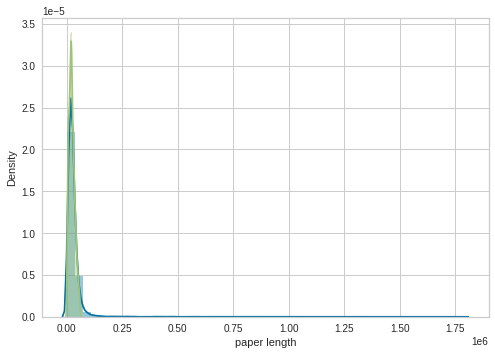

In [ ]:


# %%
# Define pretty class timer
# This is for execution time calculation

class Timer:
    def __init__(self):
        self.start_time = 0
        self.end_time = 0
        self.time_elapsed = 0

    def start(self, text = "Start running ..."):
        print("\n--------------------------------------\n" + text + datetime.now().strftime("%H:%M:%S"))
        self.start_time = time.time()

    def stop(self, text="End running ..."):
        self.end_time = time.time()
        self.time_elapsed = self.end_time - self.start_time
        print('Running time : %s for %s' % (time.strftime('%H:%M:%S', time.gmtime(self.time_elapsed)), text))
        print('--------------------------------------\n')
        self.start_time = 0
        self.end_time = 0

timer = Timer()




# %%
## 1 . Loading and cleaning the papers dataset


## CORD-19 dataset local paths
data_path = '.' #update_path
pdf_json_path = f'{data_path}/document_parses/pdf_json' #update_path
out_path = './output'


# %%
# Loading the CSV metadata file to a pandas dataframe

timer.start(text='Loading metatata ...')
df_metadata = pd.read_csv( f'{data_path}/cord192020/cord/metadata.csv' , #update_path
    dtype={
        'doi': str,
        'pubmed_id': str,
        'mag_id': str,
        's2_id': str
    })

print("Metadata size : ", df_metadata.shape)
timer.stop(text='Loading metatata ...')

# %%
df_metadata.info()
df_metadata.head()


# %%
## Cleaning Metadata

# Drop rows with null 'sha' attribut
df_metadata = df_metadata[df_metadata['sha'].notna()]
# Drop rows with duplicate 'sha' attribut
df_metadata.drop_duplicates(subset=['sha'], inplace=True)

print("Metadata size : ", df_metadata.shape)


# %%
# Keep only papers with only one 'sha'
df_metadata["len_sha"] = df_metadata['sha'].apply(lambda x: len(x.split()))
df_metadata = df_metadata[df_metadata['len_sha'] == 1]

print("Metadata size : ", df_metadata.shape)

# %%
print("Papers with pdf_json    : ", df_metadata["pdf_json_files"].count())
print("Papers without pdf_json : " , df_metadata["pdf_json_files"].isna().sum())

# %%
# Get all paths to JSON files 
pdf_json_paths = glob.glob(f'{data_path}/document_parses/pdf_json/*.json', recursive=True)
print("Number of pdf_json files in dataset : " , len(pdf_json_paths))

# %%
paths = set([f'{data_path}/document_parses/pdf_json/{sha}.json' for sha in df_metadata['sha'].values ])
pdf_json_paths = list(paths.intersection(set(pdf_json_paths)))
print("Number of pdf_json processable files in dataset : " , len(pdf_json_paths))


# %%
pdf_json_files = []
for files in df_metadata['pdf_json_files']: 
    if not pd.isna(files) :
        pdf_json_files.extend([file.strip() for file in files.split(';')])
pdf_json_files = set(pdf_json_files)    
print("Number of pdf_json files in metadata : " , len(pdf_json_files))



# %%

# pick a subset of the dataset (for debugging only)
# for a standard computer keep a small number of document (10000 for example)

n_sample = 10000
from random import sample 
pdf_json_paths = sample (pdf_json_paths, n_sample)
len(pdf_json_paths)


# %%
## Loading JSON files 

# First we define a class Paper 

class Paper:
    def __init__(self):
        self.cord_uid = ''
        self.sha = []
        self.title = ''
        self.authors = []
        self.abstract = ''
        self.body_text = ''
        self.doi = ''
        self.journal = ''
        self.publish_time = ''

        self.lang = ''
        self.cluster = 0

        self.body_length = 0
        self.abstract_length = 0
        self.body_words_count = 0
        self.abstract_words_count = 0

        self.processed_text = ''
        self.processed_abstract = ''

        self.vect = {} 
    
    def __repr__(self):
        return f'{self.cord_uid} :\nTitle :\n{self.title}\nAbstract : \n{self.abstract[:200]}\nBody Text : \n{self.body_text[:200]}...'

# %%

# function for reading a JSON file into a Paper Object

def read_pdf_json_file (file_path):
    paper = Paper()
    try :
        with open(file_path) as file:
            content = json.load(file)
            
            paper.sha = content['paper_id'].strip()
            paper.title = content['metadata']['title'].strip().lower()

            # Extract authors
            for entry in content['metadata']['authors']:
                paper.authors.append(entry['first'].strip().lower() + '_' + entry['last'].strip().lower())
            
            # Extract Abstract
            abstract = []
            for entry in content['abstract']:
                abstract.append(entry['text'].strip().lower())
            paper.abstract = '\n'.join(abstract) # abstract as str

            # Extract body text
            body_text = []
            for entry in content['body_text']:
                body_text.append(entry['text'].strip().lower())
            paper.body_text = '\n'.join(body_text) # body_text as str
    except Exception as e:
        return None

    # get metadata information
    meta_data = df_metadata.loc[paper.sha == df_metadata['sha']]

    if len(meta_data) == 0:
        return None

    paper.cord_uid = meta_data['cord_uid'].values[0]
    paper.doi = meta_data['doi'].values[0]
    paper.journal = meta_data['journal'].values[0]
    paper.publish_time = meta_data['publish_time'].values[0]
                
    return paper

# %%

# Now let's read all JSON papers

timer.start('Reading json papers ... ')

with Pool(cores) as pool:
    papers = pool.map(read_pdf_json_file, pdf_json_paths)
papers = [paper for paper in papers if paper]

timer.stop('reading json papers')
print("Reading JSON files OK ... ")
print(len(papers), "papers.\n")


# %%
## Delete Unnecessary variables 
del df_metadata
del paths
del pdf_json_files
del pdf_json_paths


# %%
## Counting characters and words in body text and abstract of each paper

timer.start('Words and chars counting ... ')
for paper in papers:
    paper.body_length = len(paper.body_text)
    paper.body_words_count = len(paper.body_text.split())

    paper.abstract_length = len(paper.abstract)
    paper.abstract_words_count = len(paper.abstract.split())
timer.stop('Words and chars counting ... ')


# %%

# Plot paper length distribution and save figure to output folder
print("number of papers before", len(papers))
sns_plot = sns.distplot([paper.body_length for paper in papers], axlabel="paper length")
sns_plot.figure.savefig(f'{out_path}/sns_fig1.png')

# %%

# Clean outliers 
# Remove papers with body_length > 60000 chars or body_length < 1000 chars 

for i in range(len(papers)-1, -1, -1) :
    if papers[i].body_length > 60000 or papers[i].body_length < 1000 : 
        papers.pop(i)

print("Number of papers after: ", len(papers))

# Plot and save the new distribution
sns_plot = sns.distplot([paper.body_length for paper in papers])
sns_plot.figure.savefig(f'{out_path}/sns_fig2.png')




New custom stop words :
['i.e.', 'e.g.', 'etc', 'inc.', 'fig', 'fig.', 'tab.', 'ii', 'iii', 'iv', 'vi', 'vii', 'viii', 'iix', 'ix', 'doi', 'preprint', 'copyright', 'org', 'https', 'et', 'al', 'al.', 'author', 'figure', 'table', 'peer', 'reviewed', 'http', 'www', 'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'elsevier', 'pmc', 'czi', '-pron-', 'usually', 'us$']

--------------------------------------
NLP Processing ... 14:43:26


/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)



Languages : 
 Counter({'en': 9140, 'es': 88, 'fr': 88, 'de': 40, 'nl': 10, 'pt': 1, 'it': 1})
Running time : 01:21:26 for NLP Processing ... 
--------------------------------------

Number of papers :  9140
Max number of words :  5766
Max number of words :  0

--------------------------------------
Remove words with special chars ... 16:04:52
Running time : 00:00:42 for Remove words with special chars ... 
--------------------------------------

Max number of words :  5526
Mix number of words :  0
number of papers after rmv special words 9140
Number of papers :  9118
number of papers after rmv less than 100 9118


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of papers :  8749
number of papers after rmv more than 4000 8749


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


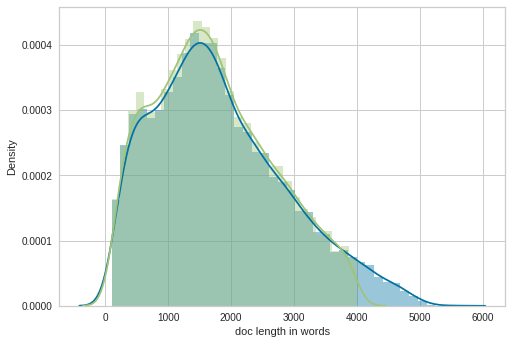

In [ ]:
# %% 
# 2 . NLP Preprocessing using Spacy : 
# Tokenization, Lemmatization, Language detection, and stopwords removal
#from spacy_langdetect import LanguageDetector
#from spacy.language import Language
nlp = spacy.load("en_core_sci_lg", disable=["tagger", "ner"])
#@Language.factory('language_detector')
#def language_detector(nlp, name):
#    return LanguageDetector()
#nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
nlp.add_pipe('language_detector')
nlp.max_length = 1000000   # must be the max of len(text)


# New list of custom stop words defined in a text file  
custom_stop_words = []
with open (f'./custom_stop_words.txt') as f :
    custom_stop_words = [w.strip() for w in f.readlines()]
print("New custom stop words :")
print(custom_stop_words)

# Mark them as stop words
for w in custom_stop_words:
    nlp.vocab[w].is_stop = True

# Mark also NLTK stopwords 
nltk_stopwords = nltk.corpus.stopwords.words('english')
for w in nltk_stopwords:
    nlp.vocab[w].is_stop = True


# Define the tokenizer
def spacy_tokenizer(text):
    doc = nlp(text)
    if doc._.language['language'] == 'en' : 
        return [word.lemma_ for word in doc if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]
    else : 
        return [doc._.language['language']]

# %% 
## Papers preprocessing

texts = []
for paper in papers :
    texts.append(paper.body_text)

timer.start(text='NLP Processing ... ')

with Pool(cores) as pool:
    processed_texts = pool.map(spacy_tokenizer, texts)

langs = []
for i in range (len(papers)):
    if len(processed_texts[i]) == 1 : 
        papers[i].lang = processed_texts[i][0]
    else :
        papers[i].processed_text = processed_texts[i]
        papers[i].lang = 'en'
    langs.append(papers[i].lang)

counter = collections.Counter(langs)
print("\nLanguages : \n", counter)

del processed_texts
del texts
del langs

timer.stop(text='NLP Processing ... ')


# %% 
# drop papers that are not english
for i in range(len(papers)-1, -1, -1):
    if papers[i].lang != 'en' : papers.pop(i)

print("Number of papers : ", len(papers))


# %%

# function that checks if a word contains any special character

def check_special_chars (word) :
    p = re.compile( '[@#$&%*:;<>+=`"\|\[\]_!?~∼)(}{\.\,\'"−]' )
    if p.search(word) == None : return True
    else : return False

def remove_special_chars_doc (doc) :
    return [word for word in doc if check_special_chars(word) ]

# %%

# Remove words with special chars

docs = []
for paper in papers :
    docs.append(paper.processed_text)

f = []
for doc in docs :
    f.append(len(doc))
print("Max number of words : ", max(f))
print("Max number of words : ", min(f))


timer.start('Remove words with special chars ... ')

with Pool(cores) as pool:
    docs = pool.map(remove_special_chars_doc, docs)

timer.stop('Remove words with special chars ... ')

f = []
for doc in docs :
    f.append(len(doc))
print("Max number of words : ", max(f))
print("Mix number of words : ", min(f))

print("number of papers after rmv special words", len(docs))

#%%

# Remove papers that have less than 100 words

for i in range(len(docs)):
    papers[i].processed_text = docs[i]

for i in range(len(papers)-1, -1, -1):
    if len(papers[i].processed_text) < 100 : papers.pop(i)

print("Number of papers : ", len(papers))

docs = []
for paper in papers :
    docs.append(paper.processed_text)
print("number of papers after rmv less than 100", len(docs))

# %%
# Display and save doc length distribution

sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")
sns_plot.figure.savefig(f'{out_path}/sns_fig3.png')


#%%

# Remove papers that have more than 4000 words

for i in range(len(papers)-1, -1, -1):
    if len(papers[i].processed_text) > 4000 : papers.pop(i)

print("Number of papers : ", len(papers))

docs = []
for paper in papers :
    docs.append(paper.processed_text)
print("number of papers after rmv more than 4000", len(docs))
# %%

# Display and save the new  distribution
sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")
sns_plot.figure.savefig(f'{out_path}/sns_fig4.png')


--------------------------------------
Word counting ... 15:28:37
Running time : 00:00:09 for Word counting ... 
--------------------------------------



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



--------------------------------------
Remove infrequent words ... 15:28:47
Running time : 00:00:24 for Remove infrequent words ... 
--------------------------------------

Max number of words :  3968
Max number of words :  82
Number of papers :  8776


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


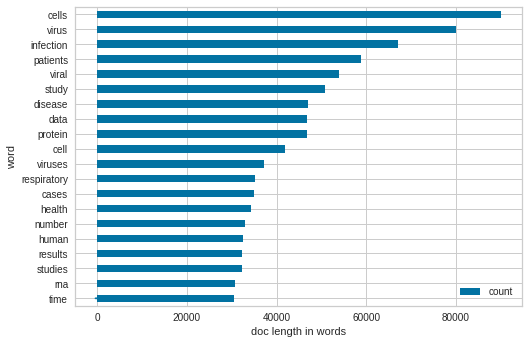

In [ ]:
# %% 
## 3 . Word counting

# What are most frequent words

timer.start('Word counting ... ')

def dummy_fun(doc):
    return doc

count_model = CountVectorizer(min_df=2,
                                    analyzer='word', 
                                    tokenizer=dummy_fun, 
                                    preprocessor=dummy_fun, 
                                    token_pattern=None)
X_count = count_model.fit_transform(docs)

timer.stop('Word counting ... ')

# most frequent words
word_count = pd.DataFrame({'word': count_model.get_feature_names(), 'count': np.asarray(X_count.sum(axis=0))[0]})
plot_count = word_count.sort_values('count', ascending=False).set_index('word')[:20].sort_values('count', ascending=True).plot(kind='barh')
plot_count.figure.savefig(f'{out_path}/count_fig.png')


#%%

# Remove infrequent words

word_count.sort_values(by=['count'], ascending=False, inplace=True)
words = list(word_count['word'].values)
counts = list(word_count['count'].values)

vocab_dict = {}
for i in range (len(words)):
    vocab_dict[words[i]] = counts[i]


def remove_unfreq_words (doc) :
    return [word for word in doc if word in vocab_dict ]

timer.start('Remove infrequent words ... ')

with Pool(cores) as pool:
    docs = pool.map(remove_unfreq_words, docs)

timer.stop('Remove infrequent words ... ')

f = []
for doc in docs :
    f.append(len(doc))
print("Max number of words : ", max(f))
print("Min number of words : ", min(f))


#%%

# Remove papers that have less than 100 words

for i in range(len(docs)):
    papers[i].processed_text = docs[i]

for i in range(len(papers)-1, -1, -1):
    if len(papers[i].processed_text) < 100 : papers.pop(i)

print("Number of papers : ", len(papers))

docs = []
for paper in papers :
    docs.append(paper.processed_text)

#%%

sns_plot = sns.distplot([len(doc) for doc in docs], axlabel="doc length in words")
sns_plot.figure.savefig(f'{out_path}/sns_fig5.png')


# %%
# Delete unecessary variables 
del counts
del words
del word_count 


In [ ]:
# %%
## 4.  Documents (papers) vectorization using Doc2Vec

## Prepare model and documents

## instantiating a Doc2Vec model with a vector size with 300 dimensions and iterating over the training corpus 10 times.
# We set the minimum word count to 2 in order to discard words with very few occurrences.

doc2vec_model = Doc2Vec(vector_size=300, min_count=2, epochs=10)

# Training corpus
documents = [TaggedDocument(words=doc, tags=[i]) for i , doc in enumerate(docs)]

# Build model vocabulary
doc2vec_model.build_vocab([doc for doc in documents])

#%%
## Train and save the model

timer.start(text='Doc2Vec Training ...')

doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

timer.stop(text='Doc2Vec Training ...')

doc2vec_model.save(f'{out_path}/doc2vec.model')
print("Model Saved")


# %%
# infer papers vectors using Doc2Vec trained model
X_doc2vec = [doc2vec_model.infer_vector(doc.words) for doc in documents]






--------------------------------------
Doc2Vec Training ...15:51:51
Running time : 00:08:22 for Doc2Vec Training ...
--------------------------------------

Model Saved


In [ ]:
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)
# stack result as numpy array
X_doc2vec = np.vstack(X_doc2vec)

None



--------------------------------------
Running KMeans with elbow ...08:51:39


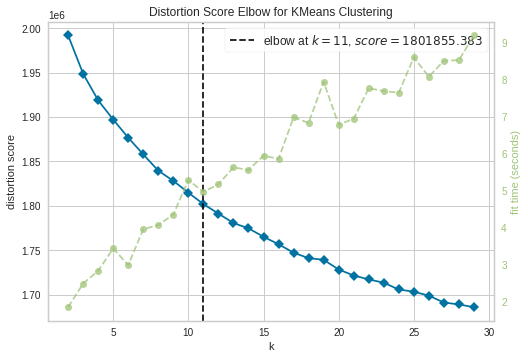

Running time : 00:02:47 for Running KMeans with elbow ...
--------------------------------------


--------------------------------------
Running KMeans with k = 11 ... 08:54:26
Running time : 00:00:05 for Running KMeans ...
--------------------------------------


--------------------------------------
Running TSNE ...08:54:32


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Running time : 00:02:45 for Running TSNE ...
--------------------------------------



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


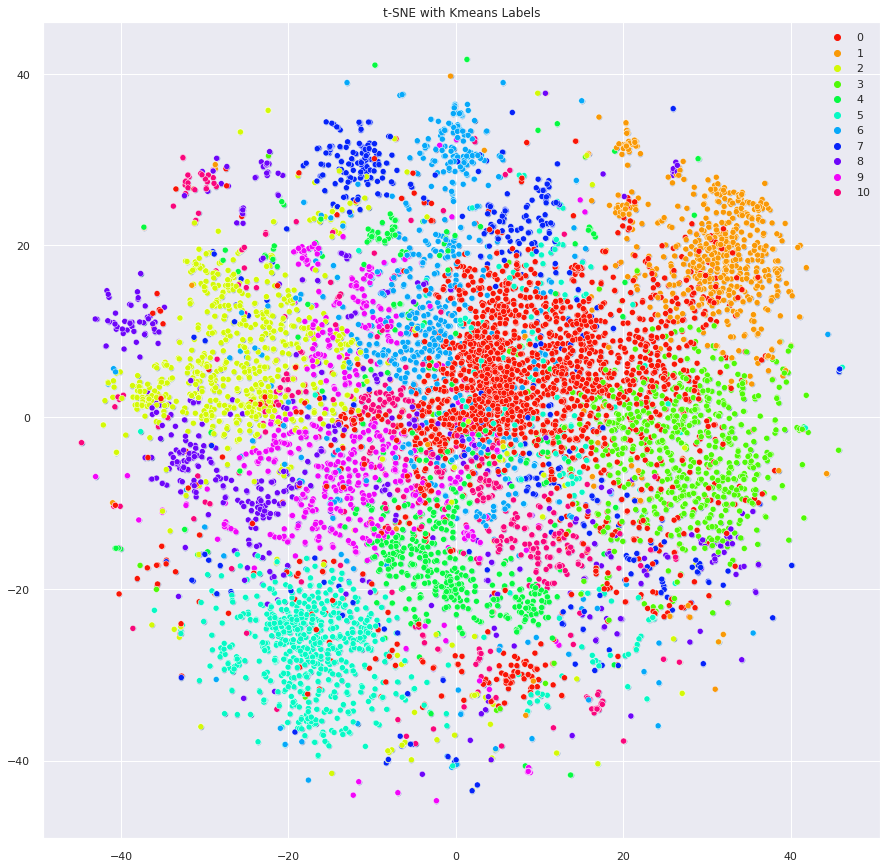

In [ ]:
# %%

## 5. Run KMeans and get the optimal value of K using elbow 

timer.start(text='Running KMeans with elbow ...')
km_model = KMeans()
elbow_model = KElbowVisualizer(km_model, k=(2,30))
elbow_model.fit(X_doc2vec)
fig = elbow_model.show()
fig.figure.savefig(f'{out_path}/elbow.png')

timer.stop(text='Running KMeans with elbow ...')

# %%
# Run KMeans with the optimal value of K
timer.start(text='Running KMeans with k = ' + str(elbow_model.elbow_value_) + ' ... ' )
k = elbow_model.elbow_value_
#km_model = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
km_model = KMeans(n_clusters=k, random_state=42)
km_model.fit(X_doc2vec)
clusters = km_model.predict(X_doc2vec) # km_model.labels_

# Assign papers to their clusters 
for i in range (len(papers)):
    papers[i].cluster = clusters[i]

timer.stop(text='Running KMeans ...')


# %%

# Run TSNE for 2D visualisation with and without labels 

timer.start(text='Running TSNE ...')

from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=50, random_state=42)
X_tsne = tsne_model.fit_transform(X_doc2vec)

timer.stop(text='Running TSNE ...')


# %%
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig(f'{out_path}/t-sne_cord-19_papers.png')


# %%
# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(k, l=.5, s=0.95)

# plot
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=[paper.cluster for paper in papers], legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig(f'{out_path}/t-sne_with_labels_cord-19_papers.png')

(8686, 300)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


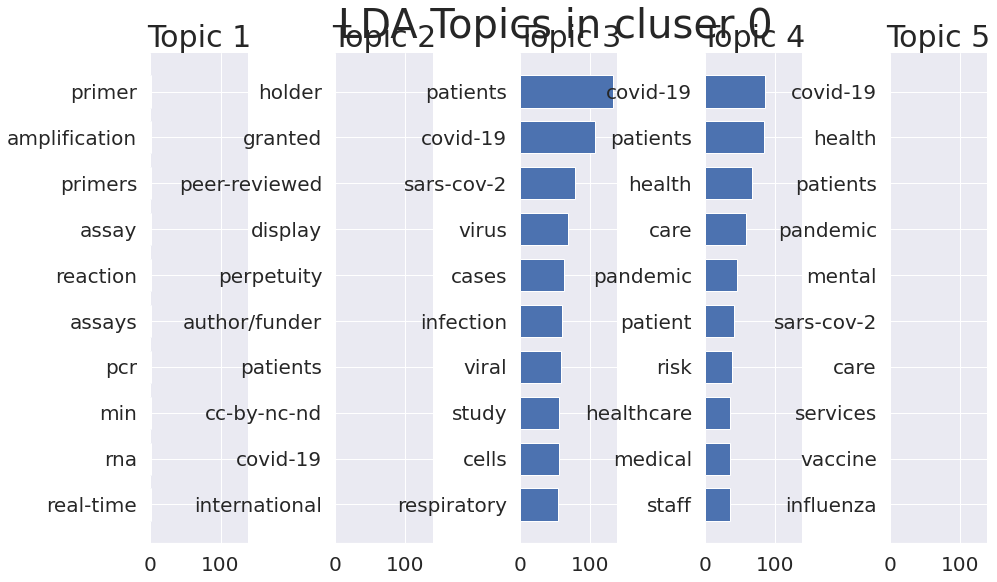

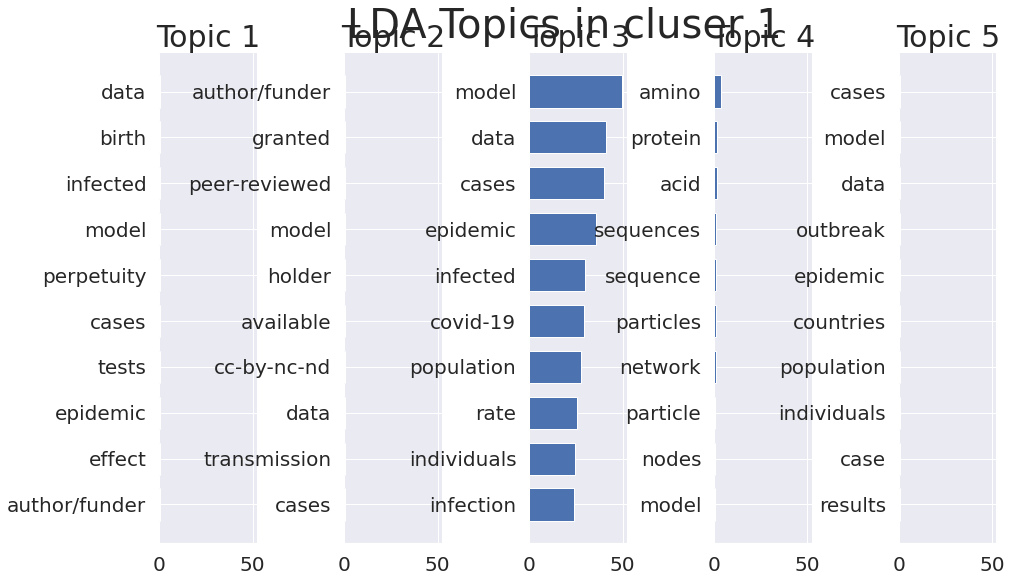

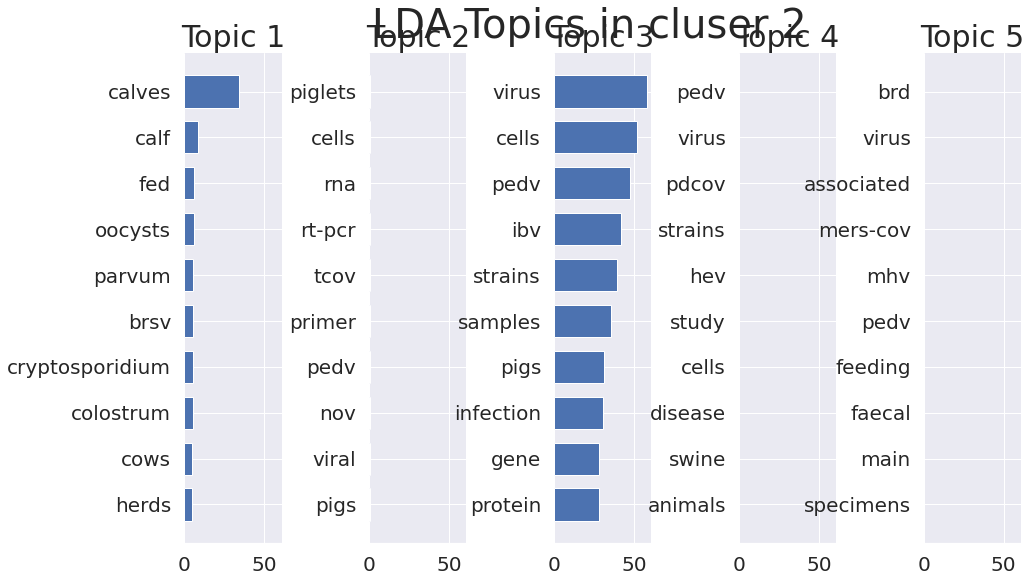

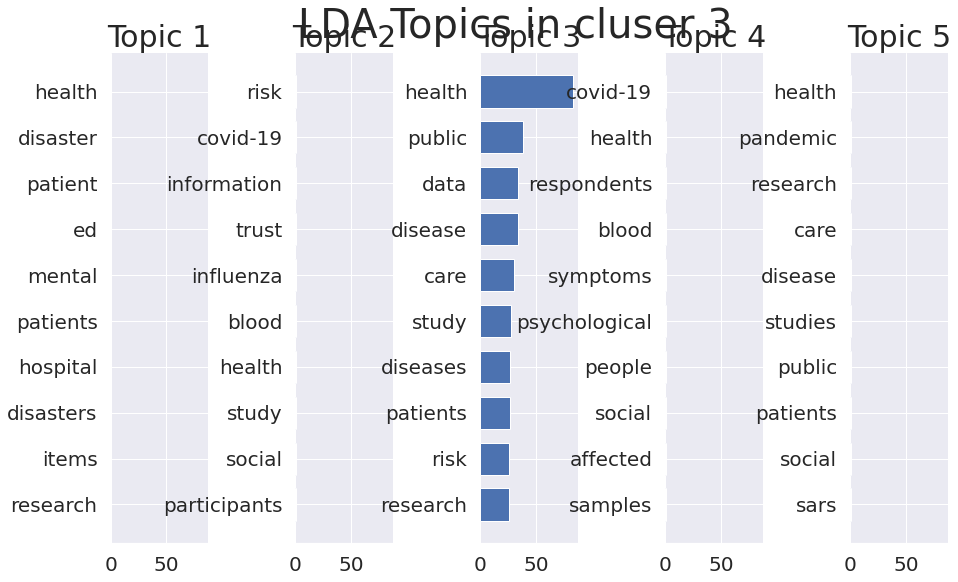

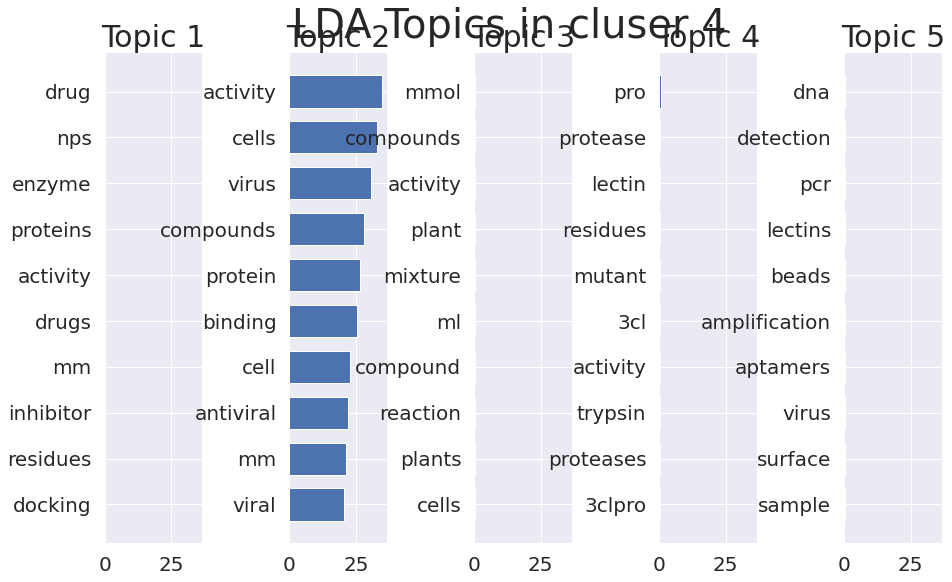

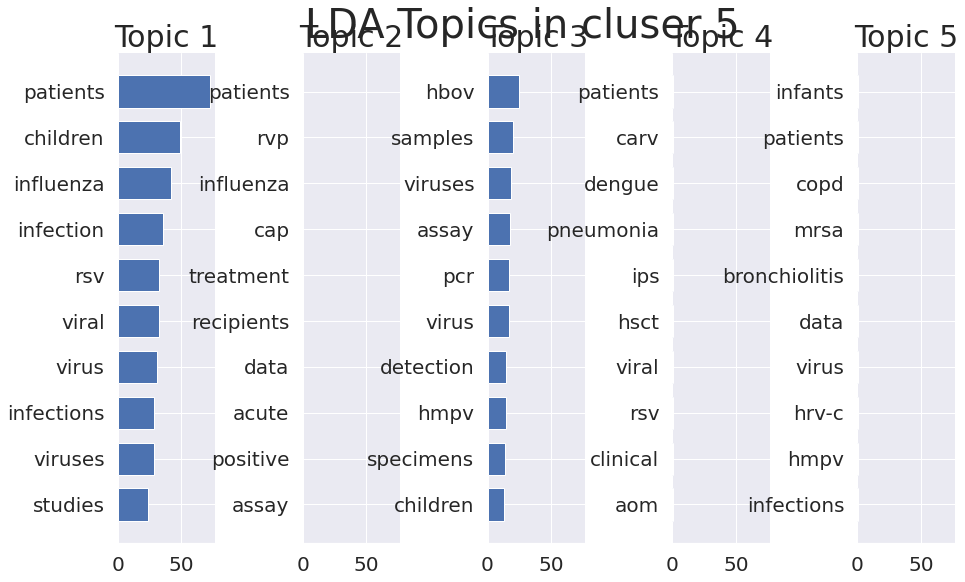

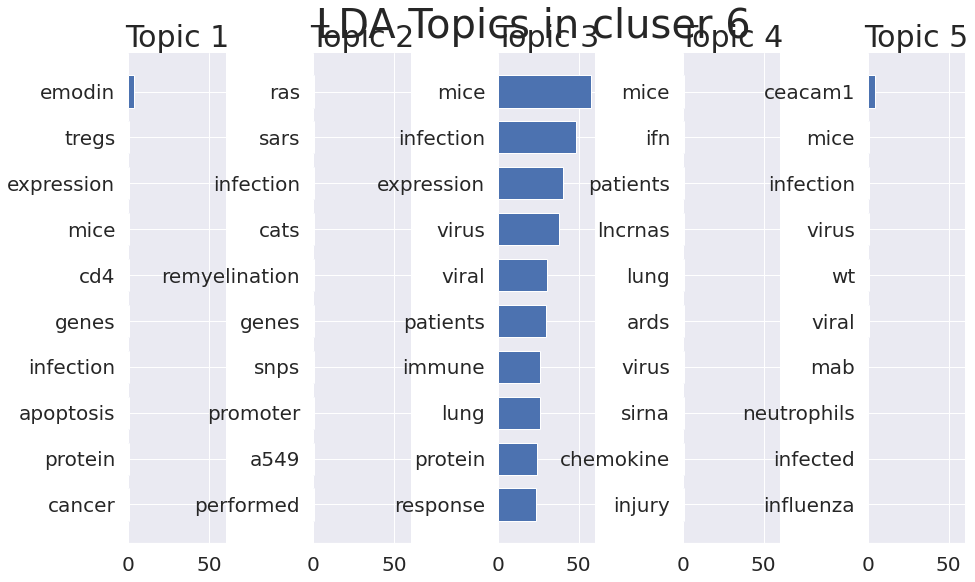

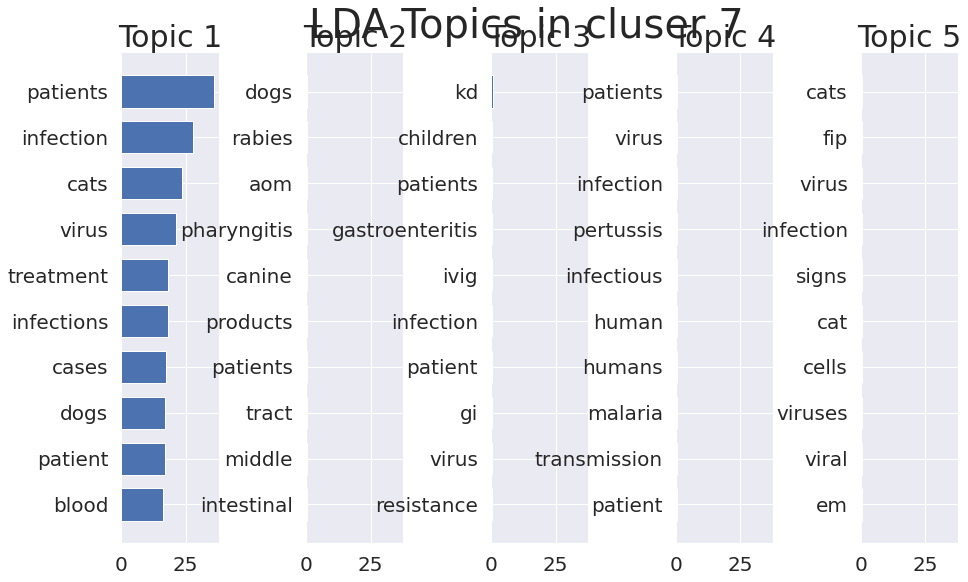

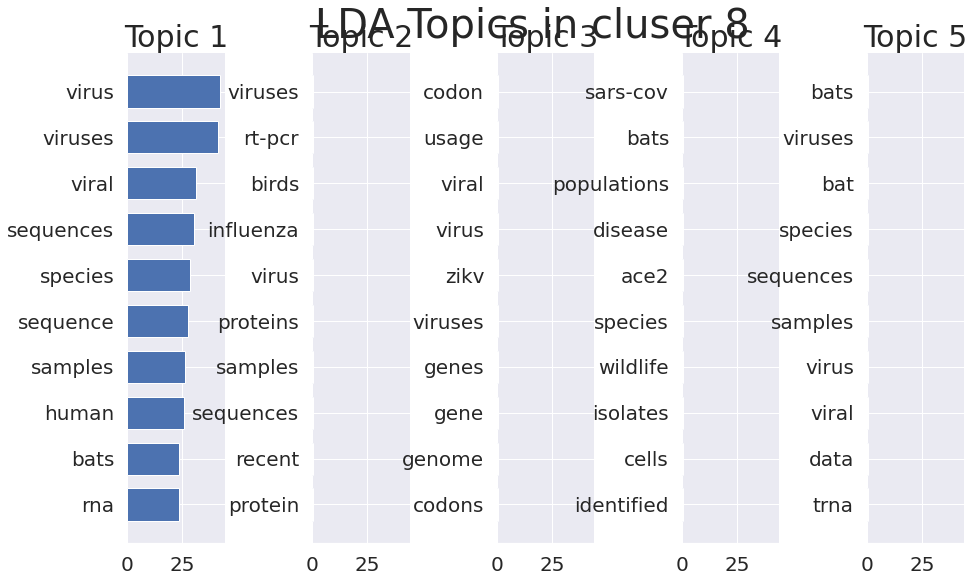

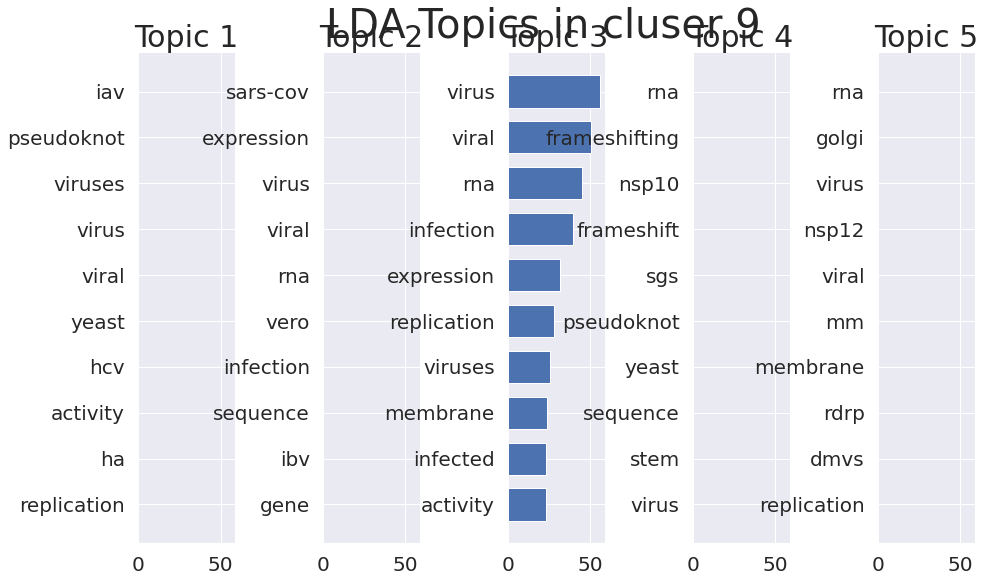

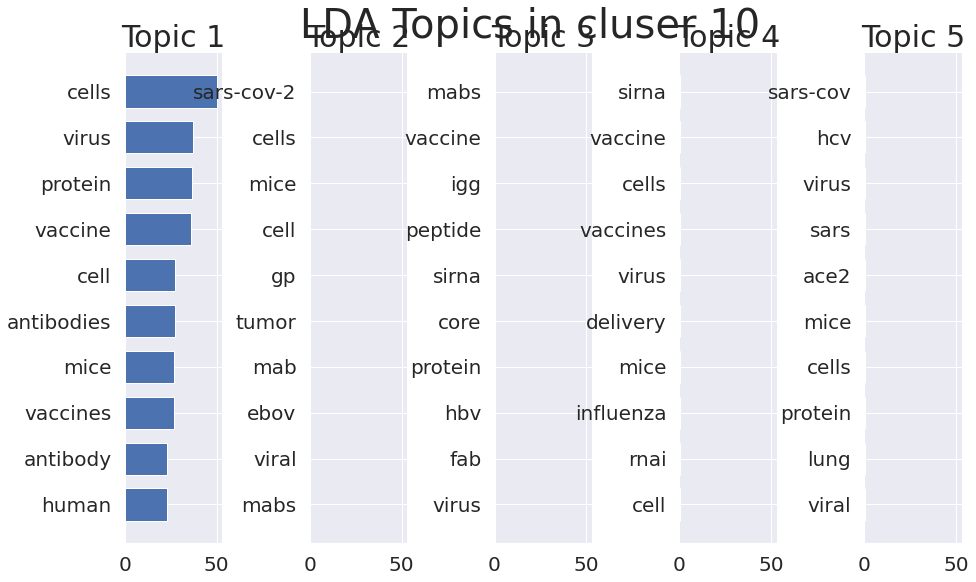

<Figure size 1080x1080 with 0 Axes>

In [ ]:


# %%
# 6. Topic Detection using LDA in each cluster 

print(X_doc2vec.shape)

from sklearn.decomposition import NMF, LatentDirichletAllocation

def plot_cluster_tpoics(model, feature_names, n_top_words, title):
    plt.close('all')
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    plt.savefig(f'{out_path}/{title}.png')
    


# %%

n_topics_cluster = 5
n_top_words = 10
n_features = 1000

# %%

def dummy_fun(doc):
    return doc

for cluster in range(k):
    
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                    analyzer='word', 
                                    tokenizer=dummy_fun, 
                                    preprocessor=dummy_fun, 
                                    token_pattern=None)

    X_tfidf = tfidf_vectorizer.fit_transform ( [paper.processed_text for paper in papers if paper.cluster == cluster] )
    tf_feature_names = tfidf_vectorizer.get_feature_names()
    
    lda_model = LatentDirichletAllocation(n_components=n_topics_cluster, 
                                    max_iter=10,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=0)
    lda_model.fit(X_tfidf)

    plot_cluster_tpoics(lda_model, tf_feature_names, n_top_words, f'LDA Topics in cluser {cluster}')
# %%